In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hour.csv')

#df.isnull().sum()
#df.columns
#df.describe()
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [35]:
df2 = df.drop(['instant', 'dteday', 'yr', 'atemp', 'casual', 'registered'], axis = 1)

df.season = df.season.astype('category')
df.mnth = df.mnth.astype('category')
df.holiday = df.holiday.astype('category')
df.weekday = df.weekday.astype('category')
df.workingday = df.workingday.astype('category')
df.weathersit = df.weathersit.astype('category')

df2 = pd.get_dummies(df2)

In [36]:
df2.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,0.0,16,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.80,0.0,40,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.80,0.0,32,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.75,0.0,13,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.75,0.0,1,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [41]:
X = df2.copy()
X = X.drop(['cnt'], axis = 1)
y = df2['cnt']
y = np.array(y)

In [46]:
# Scaling
#X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [6]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)

r2 = r2_score(y, model_lr_prediction)
print('The rsquared value is: ' + str(r2))

lr_accuracy = accuracy_score(y_test, model_lr_prediction)
lr_accuracy

0.01534330648254699

In [7]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.0

In [8]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, model_dt_prediction)
dt_accuracy

0.025700038358266206

In [9]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.022462086024054084

Maximum:  0.03222094361334868
Mean:  0.02008154666892928


<AxesSubplot:>

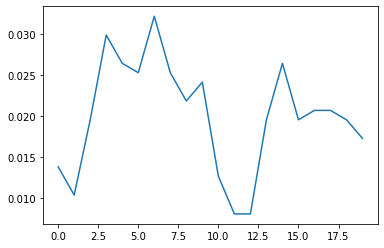

In [10]:
# K-Fold DecisionTree
dt_plot = cross_val_score(tree.DecisionTreeClassifier(max_depth = 5), X, y, cv=20)
print('Maximum: ', dt_plot.max())
#cvs_dt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10).mean()
print('Mean: ', dt_plot.mean())
dt_plot = pd.Series(dt_plot)
dt_plot.plot()

In [11]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, model_knn_prediction)
knn_accuracy

0.021288837744533946

In [12]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.017192038569952217

In [13]:
# SVM computes forever - DOESN'T WORK!
# model_svm = SVC(kernel='linear').fit(X_train, y_train)
# model_svm_prediction = model_svm.predict(X_test)
# svm_accuracy = accuracy_score(y_test, model_svm_prediction)
# svm_accuracy

In [14]:
# kappa_svm = cohen_kappa_score(y_test, model_svm_prediction)
# kappa_svm

In [15]:
model_svm2 = SVC(kernel='poly').fit(X_train, y_train)
model_svm2_prediction = model_svm2.predict(X_test)
svm2_accuracy = accuracy_score(y_test, model_svm2_prediction)
svm2_accuracy

0.01534330648254699

In [16]:
kappa_svm2 = cohen_kappa_score(y_test, model_svm2_prediction)
kappa_svm2

0.0

In [17]:
print(classification_report(y_test,model_svm2_prediction))

   0.00         5
         347       0.00      0.00      0.00         7
         348       0.00      0.00      0.00         1
         349       0.00      0.00      0.00         9
         350       0.00      0.00      0.00         6
         351       0.00      0.00      0.00         6
         352       0.00      0.00      0.00         3
         353       0.00      0.00      0.00         2
         354       0.00      0.00      0.00         5
         355       0.00      0.00      0.00         6
         356       0.00      0.00      0.00         3
         357       0.00      0.00      0.00         2
         358       0.00      0.00      0.00         4
         359       0.00      0.00      0.00         3
         360       0.00      0.00      0.00         5
         361       0.00      0.00      0.00         6
         362       0.00      0.00      0.00         3
         363       0.00      0.00      0.00         6
         364       0.00      0.00      0.00         1
         3

In [18]:
model_svm3 = SVC(kernel='rbf').fit(X_train, y_train)
model_svm3_prediction = model_svm3.predict(X_test)
svm3_accuracy = accuracy_score(y_test, model_svm3_prediction)
svm3_accuracy

0.01534330648254699

In [19]:
kappa_svm3 = cohen_kappa_score(y_test, model_svm3_prediction)
kappa_svm3

0.0

In [20]:
print(classification_report(y_test,model_svm3_prediction))

   0.00         5
         347       0.00      0.00      0.00         7
         348       0.00      0.00      0.00         1
         349       0.00      0.00      0.00         9
         350       0.00      0.00      0.00         6
         351       0.00      0.00      0.00         6
         352       0.00      0.00      0.00         3
         353       0.00      0.00      0.00         2
         354       0.00      0.00      0.00         5
         355       0.00      0.00      0.00         6
         356       0.00      0.00      0.00         3
         357       0.00      0.00      0.00         2
         358       0.00      0.00      0.00         4
         359       0.00      0.00      0.00         3
         360       0.00      0.00      0.00         5
         361       0.00      0.00      0.00         6
         362       0.00      0.00      0.00         3
         363       0.00      0.00      0.00         6
         364       0.00      0.00      0.00         1
         3

In [21]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, model_rf_prediction)
rf_accuracy

0.020138089758342925

In [22]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.016711455739804038

<AxesSubplot:>

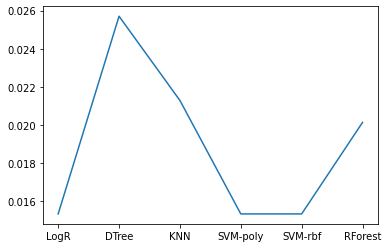

In [23]:
acc = [lr_accuracy, dt_accuracy, knn_accuracy, svm2_accuracy, svm3_accuracy, rf_accuracy]
acc = pd.Series(acc)

exploration_methods = ['LogR', 'DTree', 'KNN', 'SVM-poly', 'SVM-rbf', 'RForest']
plt.xticks(np.arange(6) , exploration_methods, rotation = 'vertical')
acc.plot()

<AxesSubplot:>

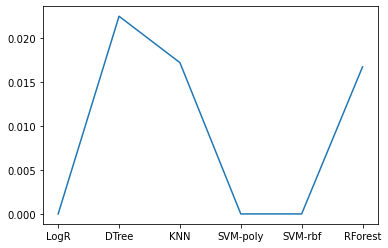

In [24]:
kappa_overview = [kappa_lr, kappa_dt, kappa_knn, kappa_svm2, kappa_svm3, kappa_rf]
kappa_overview = pd.Series(kappa_overview)

plt.xticks(np.arange(6), exploration_methods, rotation='45')
kappa_overview.plot()

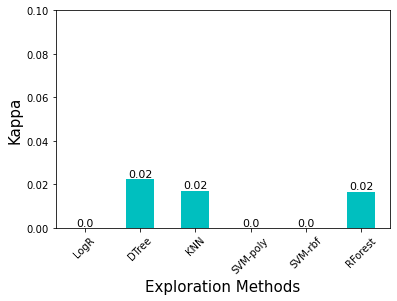

In [25]:
plt.bar(x=exploration_methods, height = kappa_overview, color = 'c', width = 0.5)
#plt.grid()
#plt.title('Efficiency of Machine Learning in Prediction of Quality by Chemical Measures')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('Kappa', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0, 0.1)

for i in range(6):
  plt.text(
      x = i, 
      y = kappa_overview[i], 
      s = round(kappa_overview[i], 2), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()